In [2]:
import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

### Bayesian Optimiser - 2 Users

In [72]:
# Bounded region of parameter space
C = 10 # Capacity size
pbounds = {'alpha1': (0.1, C), 'alpha2': (0.1, C),'beta1':(0.1,1.0),'beta2':(0.1,1.0)}

def black_box_function(alpha1, alpha2, beta1, beta2):
    # Initial values
    X1 = 6
    X2 = 4
    initial_C = 10
    iterations = 300

    # Lists to store values for plotting
    X1_values = [X1]
    X2_values = [X2]

    # Sigmoid parameters
    sigmoid_scale = 0.05
    sigmoid_shift = 5

    # Sigmoid function
    def sigmoid(x):
        return 1 / (1 + np.exp(-sigmoid_scale * (x - sigmoid_shift)))

    # AIMD algorithm
    for i in range(iterations):
        if X1 + X2 < initial_C:
            X1 = X1 + alpha1 * sigmoid(X1)
            X2 = X2 + alpha2 * sigmoid(X2)
        else:
            X1 = X1 * beta1
            X2 = X2 * beta2
        
        # Append X1 and X2 values to lists
        X1_values.append(X1)
        X2_values.append(X2)

    # Final X1 and X2 values
    final_X1 = X1_values[-1]
    final_X2 = X2_values[-1]

    
    # Calculate the distance to the fairness line (x1 = x2)
    fairness_distance = abs(final_X1 - final_X2) / np.sqrt(2)

    # Calculate the distance to the efficiency line (x1 + x2 = initial_C)
    efficiency_distance = abs(final_X1 + final_X2 - initial_C) / np.sqrt(2)

    # Calculate the sum of distances
    total_distance = fairness_distance + efficiency_distance
    
    return 1 / total_distance
    
    # return 1/distance


optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)


In [73]:
optimizer.maximize(
    init_points=2,
    n_iter=10,
)

|   iter    |  target   |  alpha1   |  alpha2   |   beta1   |   beta2   |
-------------------------------------------------------------------------
| 1         | 0.1392    | 4.229     | 7.231     | 0.1001    | 0.3721    |
| 2         | 1.254     | 1.553     | 1.014     | 0.2676    | 0.411     |
| 3         | 1.832     | 1.448     | 0.8285    | 0.2924    | 0.5225    |
| 4         | 0.3386    | 4.481     | 4.193     | 0.593     | 0.7698    |
| 5         | 1.244     | 1.425     | 0.6087    | 0.2556    | 0.7217    |
| 6         | 0.3058    | 0.3099    | 8.098     | 0.9684    | 0.7319    |
| 7         | 0.271     | 1.485     | 0.6381    | 0.3617    | 0.7338    |
| 8         | 0.1415    | 9.953     | 3.319     | 0.8352    | 0.1402    |
| 9         | 0.1523    | 9.814     | 2.777     | 0.8279    | 0.5019    |
| 10        | 0.1731    | 3.316     | 6.394     | 0.4605    | 0.7764    |
| 11        | 0.289     | 3.129     | 6.799     | 0.5962    | 0.3843    |
| 12        | 0.413     | 4.032     | 

In [74]:
print(optimizer.max)


{'target': 1.831764590779774, 'params': {'alpha1': 1.4481949265133562, 'alpha2': 0.8284839054090689, 'beta1': 0.2924294662892297, 'beta2': 0.522452246900909}}


In [75]:
best_params = optimizer.max['params']
alpha1 = best_params['alpha1']
alpha2 = best_params['alpha2']
beta1 = best_params['beta1']
beta2 = best_params['beta2']


In [76]:
X1 = 6
X2 = 4

# Sigmoid parameters
sigmoid_scale = 0.05
sigmoid_shift = 5

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-sigmoid_scale * (x - sigmoid_shift)))

initial_C = 10
iterations = 300
X1_values = [X1]
X2_values = [X2]
for i in range(iterations):
    if X1 + X2 < initial_C:
        X1 = X1 + alpha1 * sigmoid(X1)
        X2 = X2 + alpha2 * sigmoid(X2)
    else:
        X1 = X1 * beta1
        X2 = X2 * beta2
    X1_values.append(X1)
    X2_values.append(X2)


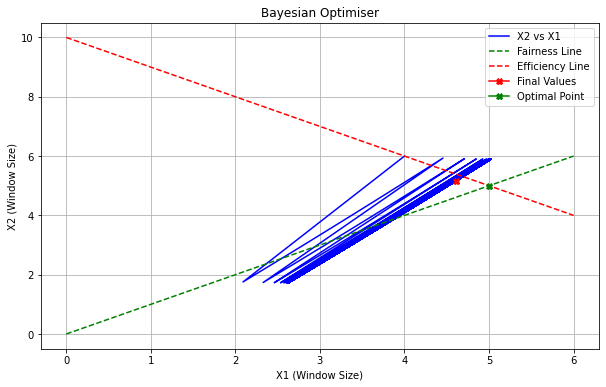

In [78]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X2_values, X1_values, label='X2 vs X1', color='blue')  # Plotting X2 vs X1
plt.xlabel('X1 (Window Size)')
plt.ylabel('X2 (Window Size)')
plt.title('Bayesian Optimiser')

# Plotting the line passing through the origin with gradient 1
max_value = max(max(X1_values), max(X2_values))
plt.plot([0, max_value], [0, max_value], linestyle='--', color='green', label='Fairness Line')


eff_X = np.linspace(0, max(X1_values), 100)  # Example X1 values
eff_y = initial_C-eff_X
plt.plot(eff_X, eff_y, linestyle='--', color='red', label='Efficiency Line')

last_X1 = X1_values[-1]
last_X2 = X2_values[-1]
plt.plot(last_X2, last_X1, marker='X',color='red', label='Final Values')

intersection = initial_C/2
plt.plot(intersection, intersection, marker='X',color='green', label='Optimal Point')

plt.legend()
plt.grid(True)
plt.show()

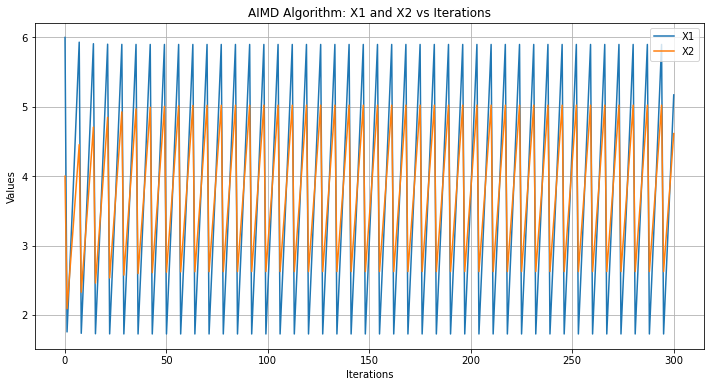

In [44]:
iterations_axis = list(range(iterations + 1))  # Adding 1 to include the initial values
initial_C_line = [initial_C] * (iterations + 1)  # Straight line for initial_C

plt.figure(figsize=(12, 6))

plt.plot(iterations_axis, X1_values, label='X1')
plt.plot(iterations_axis, X2_values, label='X2')

plt.xlabel('Iterations')
plt.ylabel('Values')
plt.title('AIMD Algorithm: X1 and X2 vs Iterations')
plt.legend()
plt.grid(True)
plt.show()


### Bayesian Optimiser - 5 Users

In [64]:
import numpy as np
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
C = 10  # Capacity size
pbounds = {'alpha1': (0.1, C), 'alpha2': (0.1, C), 'alpha3': (0.1, C), 'alpha4': (0.1, C), 'alpha5': (0.1, C),
           'beta1': (0.1, 1.0), 'beta2': (0.1, 1.0), 'beta3': (0.1, 1.0), 'beta4': (0.1, 1.0), 'beta5': (0.1, 1.0)}

def black_box_function(alpha1, alpha2, alpha3, alpha4, alpha5, beta1, beta2, beta3, beta4, beta5):
    X1 = 5
    X2 = 3
    X3 = 2
    X4 = 5
    X5 = 5


    # Sigmoid parameters
    sigmoid_scale = 0.05
    sigmoid_shift = 5

    # Sigmoid function
    def sigmoid(x):
        return 1 / (1 + np.exp(-sigmoid_scale * (x - sigmoid_shift)))

    initial_C = 20
    iterations = 300

    # Lists to store values for plotting
    X1_values = [X1]
    X2_values = [X2]
    X3_values = [X3]
    X4_values = [X4]
    X5_values = [X5]

    # AIMD algorithm
    for i in range(iterations):
        if X1 + X2 + X3 + X4 + X5 < initial_C:
            X1 = X1 + alpha1 * sigmoid(X1)
            X2 = X2 + alpha2 * sigmoid(X2)
            X3 = X3 + alpha3 * sigmoid(X3)
            X4 = X4 + alpha4 * sigmoid(X4)
            X5 = X5 + alpha5 * sigmoid(X5)
        else:
            X1 = X1 * beta1
            X2 = X2 * beta2
            X3 = X3 * beta3
            X4 = X4 * beta4
            X5 = X5 * beta5
            
        X1_values.append(X1)
        X2_values.append(X2)
        X3_values.append(X3)
        X4_values.append(X4)
        X5_values.append(X5)
        
    # Final X1, X2, and X3 values
    final_X1 = X1_values[-1]
    final_X2 = X2_values[-1]
    final_X3 = X3_values[-1]
    final_X4 = X4_values[-1]
    final_X5 = X5_values[-1]

   # Calculate the distance to the fairness line (x1 = x2 = x3)
    fairness_distance = abs(final_X1 - final_X2 - final_X3 - final_X4 - final_X5) / np.sqrt(5)

    # Calculate the distance to the efficiency line (x1 + x2 + x3 = initial_C)
    efficiency_distance = abs(final_X1 + final_X2 + final_X3 + final_X4 + final_X5 - initial_C) / np.sqrt(5)

    # Calculate the sum of distances
    total_distance = fairness_distance + efficiency_distance
    

    return 1 / total_distance


optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)


In [65]:
optimizer.maximize(
    init_points=2,
    n_iter=10,
)

|   iter    |  target   |  alpha1   |  alpha2   |  alpha3   |  alpha4   |  alpha5   |   beta1   |   beta2   |   beta3   |   beta4   |   beta5   |
-------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.1272    | 4.229     | 7.231     | 0.1011    | 3.093     | 1.553     | 0.1831    | 0.2676    | 0.411     | 0.4571    | 0.5849    |
| 2         | 0.2257    | 4.25      | 6.884     | 2.124     | 8.793     | 0.3711    | 0.7034    | 0.4756    | 0.6028    | 0.2263    | 0.2783    |
| 3         | 0.09226   | 3.883     | 7.115     | 1.954     | 8.086     | 0.741     | 0.2089    | 0.3145    | 0.7265    | 0.8564    | 0.189     |
| 4         | 0.1308    | 9.546     | 0.8632    | 6.712     | 7.757     | 4.381     | 0.2505    | 0.2124    | 0.3365    | 0.1294    | 0.644     |
| 5         | 0.0915    | 2.278     | 8.569     | 7.969     | 3.558     | 4.845     | 0.6003    | 0.4999    | 0.7306    | 0.

In [66]:
print(optimizer.max)


{'target': 0.2256757526495611, 'params': {'alpha1': 4.250025692592619, 'alpha2': 6.883673053927919, 'alpha3': 2.124077272342023, 'alpha4': 8.79336262027036, 'alpha5': 0.371137172659469, 'beta1': 0.703420759160562, 'beta2': 0.4755743221304143, 'beta3': 0.6028208456011764, 'beta4': 0.2263482447357104, 'beta5': 0.2782913401763909}}


In [67]:
best_params = optimizer.max['params']
alpha1 = best_params['alpha1']
alpha2 = best_params['alpha2']
alpha3 = best_params['alpha3']
alpha4 = best_params['alpha4']
alpha5 = best_params['alpha5']

beta1 = best_params['beta1']
beta2 = best_params['beta2']
beta3 = best_params['beta3']
beta4 = best_params['beta4']
beta5 = best_params['beta5']



In [68]:
X1 = 5
X2 = 3
X3 = 2
X4 = 5
X5 = 5


# Sigmoid parameters
sigmoid_scale = 0.05
sigmoid_shift = 5

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-sigmoid_scale * (x - sigmoid_shift)))

initial_C = 20
iterations = 300

# Lists to store values for plotting
X1_values = [X1]
X2_values = [X2]
X3_values = [X3]
X4_values = [X4]
X5_values = [X5]

# AIMD algorithm
for i in range(iterations):
    if X1 + X2 + X3 + X4 + X5 < initial_C:
        X1 = X1 + alpha1 * sigmoid(X1)
        X2 = X2 + alpha2 * sigmoid(X2)
        X3 = X3 + alpha3 * sigmoid(X3)
        X4 = X4 + alpha4 * sigmoid(X4)
        X5 = X5 + alpha5 * sigmoid(X5)
    else:
        X1 = X1 * beta1
        X2 = X2 * beta2
        X3 = X3 * beta3
        X4 = X4 * beta4
        X5 = X5 * beta5
        
    X1_values.append(X1)
    X2_values.append(X2)
    X3_values.append(X3)
    X4_values.append(X4)
    X5_values.append(X5)


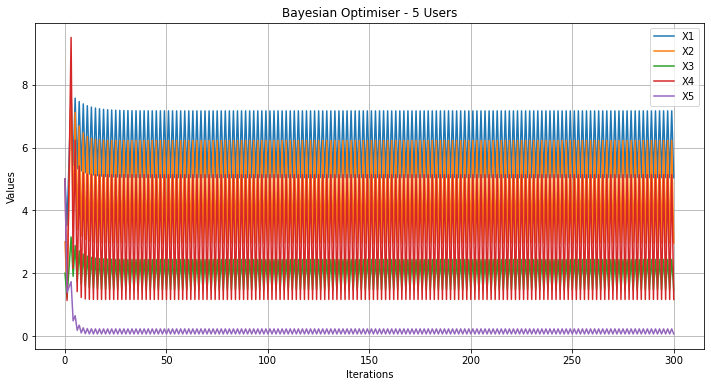

In [70]:
iterations_axis = list(range(iterations + 1))  # Adding 1 to include the initial values
initial_C_line = [initial_C] * (iterations + 1)  # Straight line for initial_C

plt.figure(figsize=(12, 6))

plt.plot(iterations_axis, X1_values, label='X1')
plt.plot(iterations_axis, X2_values, label='X2')
plt.plot(iterations_axis, X3_values, label='X3')
plt.plot(iterations_axis, X4_values, label='X4')
plt.plot(iterations_axis, X5_values, label='X5')

plt.xlabel('Iterations')
plt.ylabel('Values')
plt.title('Bayesian Optimiser - 5 Users')
plt.legend()
plt.grid(True)
plt.show()
